## Problem Statement

Did you know that over 115 million kilograms of pizza is consumed daily worldwide??? (Well according to Wikipedia anyway…)

Danny was scrolling through his Instagram feed when something really caught his eye - “80s Retro Styling and Pizza Is The Future!”

Danny was sold on the idea, but he knew that pizza alone was not going to help him get seed funding to expand his new Pizza Empire - so he had one more genius idea to combine with it - he was going to Uberize it - and so Pizza Runner was launched!

Danny started by recruiting “runners” to deliver fresh pizza from Pizza Runner Headquarters (otherwise known as Danny’s house) and also maxed out his credit card to pay freelance developers to build a mobile app to accept orders from customers.



[Danny's Pizza Runner](https://8weeksqlchallenge.com/case-study-2/)
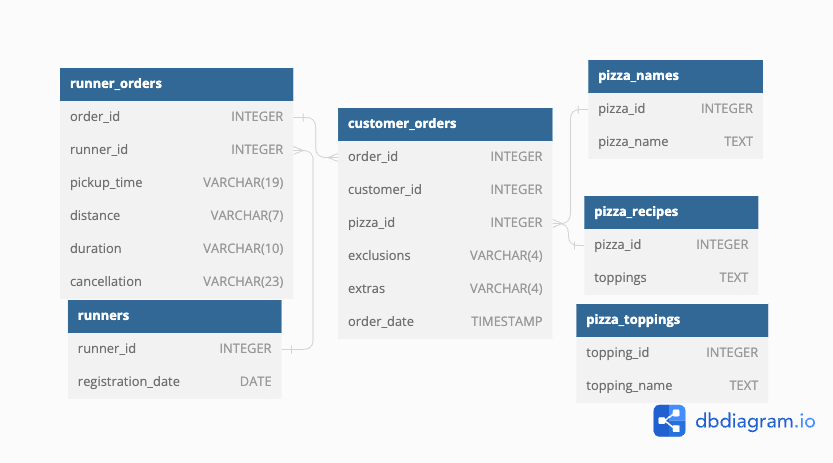

In [2]:
import mysql.connector
from mysql.connector import errorcode

from utils import read_config, create_database, dataframe_query 

DB_NAME = 'pizza_runner'

config = read_config(config_file = "../config.ini")

cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

In [3]:
cursor.execute("USE {}".format(DB_NAME))

### Data Cleaning

In [4]:
cursor.execute("CREATE TABLE customer_orders_cleaned AS \
                    SELECT order_id, customer_id, pizza_id, \
                    CASE \
                        WHEN exclusions = 'null' or exclusions = '' THEN Null \
                        ELSE exclusions \
                    END AS exclusions, \
                    CASE \
                        WHEN extras = 'Null' or extras = '' THEN Null \
                        ELSE extras \
                    END AS extras, \
                    order_time \
                    FROM customer_orders")

Changed the values from Null and empty strings to MySQL null value.

In [11]:
cursor.execute("CREATE TABLE runner_orders_cleaned AS \
                    SELECT order_id, runner_id, \
                    CASE \
                        WHEN pickup_time = 'null' THEN Null \
                        ELSE CAST(pickup_time AS DATETIME) \
                    END AS pickup_time, \
                    CASE \
                        WHEN distance = 'null' THEN Null \
                        WHEN distance LIKE '%km%' THEN CAST(REGEXP_REPLACE(distance, '%km', '') AS FLOAT) \
                        ELSE distance \
                    END AS distance, \
                    CASE \
                        WHEN duration = 'null' THEN Null \
                        WHEN duration LIKE '%min%' THEN CAST(REGEXP_REPLACE(duration, '%min%', '') AS FLOAT) \
                        ELSE duration \
                    END AS duration, \
                    CASE \
                        WHEN cancellation = 'null' or cancellation = '' THEN Null \
                        ELSE cancellation \
                    END AS cancellation \
                    FROM runner_orders")

Changed the values from Null and empty strings to MySQL null value. <br>
Further changed the datatype of pickup_time attribute, <br>
removed km from the distance values, and mins from duration <br>

## A. Pizza Metrics
1. How many pizzas were ordered?
2. How many unique customer orders were made?
3. How many successful orders were delivered by each runner?
4. How many of each type of pizza was delivered?
5. How many Vegetarian and Meatlovers were ordered by each customer?
6. What was the maximum number of pizzas delivered in a single order?
7. For each customer, how many delivered pizzas had at least 1 change and how many had no changes?
8. How many pizzas were delivered that had both exclusions and extras?
9. What was the total volume of pizzas ordered for each hour of the day?
10. What was the volume of orders for each day of the week?

In [15]:
# How many pizzas were ordered?
queryA1 = ("SELECT COUNT(*) AS OrderCount \
            FROM customer_orders_cleaned")

dataframe_query(cnx, queryA1)[1]

,OrderCount
0,14


In [25]:
# How many unique customer orders were made?
queryA2 = ("SELECT COUNT(DISTINCT(order_id)) AS UniqueOrders \
            FROM customer_orders_cleaned") 

dataframe_query(cnx, queryA2)[1]

,UniqueOrders
0,10


In [26]:
# How many successful orders were delivered by each runner?
queryA3 = ("SELECT runner_id, COUNT(order_id) AS OrdersDelivered \
            FROM runner_orders_cleaned \
            WHERE cancellation IS NULL \
            GROUP BY runner_id")

dataframe_query(cnx, queryA3)[1]

,runner_id,OrdersDelivered
0,1,4
1,2,3
2,3,1


In [24]:
# How many of each type of pizza was delivered?
queryA4 = ("SELECT pizza_id, COUNT(CO.order_id) AS OrderCount\
            FROM customer_orders_cleaned CO \
            INNER JOIN runner_orders_cleaned RO \
            ON CO.order_id = RO.order_id \
            WHERE RO.cancellation IS NULL \
            GROUP BY pizza_id")

dataframe_query(cnx, queryA4)[1]

,pizza_id,OrderCount
0,1,9
1,2,3


In [ ]:
# How many Vegetarian and Meatlovers were ordered by each customer?
queryA5 = ("")

# What was the maximum number of pizzas delivered in a single order?

# For each customer, how many delivered pizzas had at least 1 change and how many had no changes?

# How many pizzas were delivered that had both exclusions and extras?

# What was the total volume of pizzas ordered for each hour of the day?

# What was the volume of orders for each day of the week?
